In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.regularizers import L2, L1
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
train_gen = ImageDataGenerator(preprocessing_function = tf.keras.applications.vgg16.preprocess_input, validation_split = 0.1)

In [4]:
train_imgs = train_gen.flow_from_directory('Car-Bike-Dataset', target_size = (224, 224), classes = ['Bike', 'Car'], batch_size = 32, subset = 'training', shuffle = False)
test_imgs = train_gen.flow_from_directory('Car-Bike-Dataset', target_size = (224, 224), classes = ['Bike', 'Car'], batch_size = 1, subset = 'validation', shuffle = False)

Found 2761 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


### Model

In [5]:
vgg = tf.keras.applications.vgg16.VGG16(input_shape = (224, 224, 3), include_top = False, weights = 'imagenet')

In [6]:
vgg.trainable = False

In [17]:
model = Sequential()

x = GlobalAveragePooling2D()(vgg.output)

out = Dense(2, activation = 'softmax', kernel_regularizer = L2(0.0001))(x)

model = Model(inputs = vgg.input, outputs = out)

In [18]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0   

In [19]:
cb = tf.keras.callbacks.ModelCheckpoint('vgg16.ckpt', save_weights_only = True, verbose = 1)

In [20]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'sgd', 
              metrics = ['accuracy'])

In [21]:
history = model.fit(train_imgs, epochs = 4, callbacks = [cb], validation_data = test_imgs)

Epoch 1/4
87/87 [==============================] - 16s 178ms/step - loss: 1.5206 - accuracy: 0.9591 - val_loss: 0.1251 - val_accuracy: 0.9935

Epoch 00001: saving model to vgg16.ckpt
Epoch 2/4
87/87 [==============================] - 16s 180ms/step - loss: 0.0612 - accuracy: 0.9935 - val_loss: 0.0835 - val_accuracy: 0.9935

Epoch 00002: saving model to vgg16.ckpt
Epoch 3/4
87/87 [==============================] - 15s 177ms/step - loss: 0.0356 - accuracy: 0.9942 - val_loss: 0.0843 - val_accuracy: 0.9935

Epoch 00003: saving model to vgg16.ckpt
Epoch 4/4
87/87 [==============================] - 16s 178ms/step - loss: 0.0223 - accuracy: 0.9975 - val_loss: 0.0692 - val_accuracy: 0.9902

Epoch 00004: saving model to vgg16.ckpt


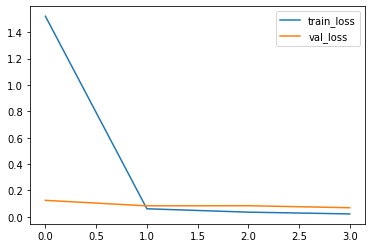

In [22]:
import matplotlib.pyplot as plt
plt.plot(model.history.history['loss'])
plt.plot(model.history.history['val_loss'])
plt.legend(['train_loss', 'val_loss'])
plt.show()

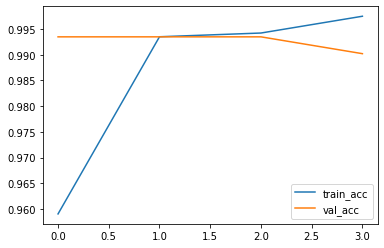

In [23]:
plt.plot(model.history.history['accuracy'])
plt.plot(model.history.history['val_accuracy'])
plt.legend(['train_acc', 'val_acc'])
plt.show()

In [25]:
model.save('vgg_16.h5')

In [2]:
!git init

Reinitialized existing Git repository in /root/Bike or Car/.git/


In [4]:
!git add .

In [5]:
!git commit -m "First commit Message"

[master c691a39] First commit Message
 1 file changed, 20 insertions(+)


In [2]:
!git remote add origin git@github.com:AbhishekBiswas12/Bike-or-Car-Classification.git
!git branch -M main
!git push -u origin main

git@github.com: Permission denied (publickey).
fatal: Could not read from remote repository.

Please make sure you have the correct access rights
and the repository exists.
